This tutorial is based on a YouTube video by [Krish Naik](https://www.youtube.com/channel/UCNU_lfiiWBdtULKOw6X0Dig). <br>
The original video can be found [here](https://youtu.be/P_iMSYQnqac).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/EDA1/master/titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


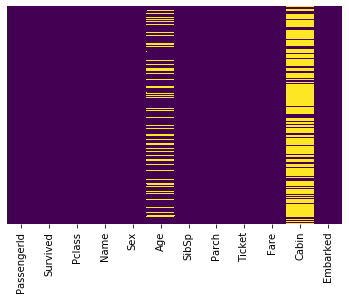

In [4]:
# check out missing data
# we use sns heatmap for the same
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
# yticklabels = False implies not to plot column names
# cbar = False means not to draw a color bar
# color bar usually tells the levels of values represented by the colors
# it is of no use if data is binary
# cmap just tells the set of colors to use

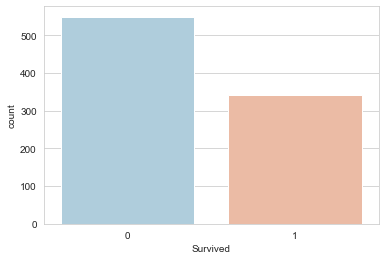

In [5]:
# the yellow lines represent null values
# now we need to replace null ages, 
# since it may have been important in considering the survival of people
# We first see how many people survived - survived == 1 implies that
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data = train, palette = 'RdBu_r')

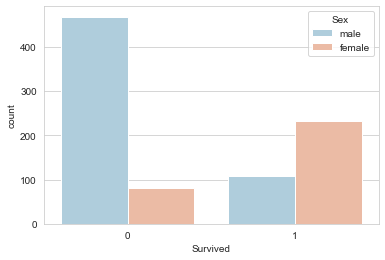

In [6]:
# next we check the same for males and females
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Sex', data = train, palette = 'RdBu_r')

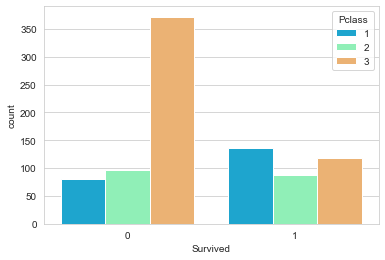

In [7]:
# next we check w.r.t. passenger class
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Pclass', data = train, palette = 'rainbow')

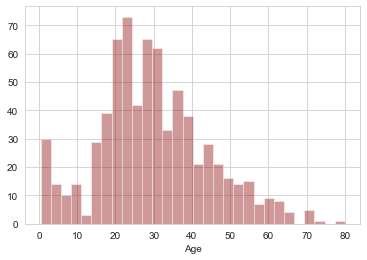

In [8]:
# we plot the distribution of age parameter
# we use distplot function for the same
# kde = False implies that Gaussian kernel density estimate is not to be plotted
# we drop the null values for age while using this function, otherwise it gives an error
sns.distplot(train['Age'].dropna(), kde = False, color = 'darkred', bins = 30)

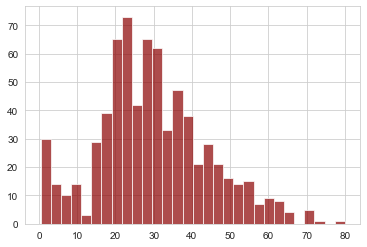

In [9]:
train['Age'].hist(bins = 30, color = 'darkred', alpha = 0.7)

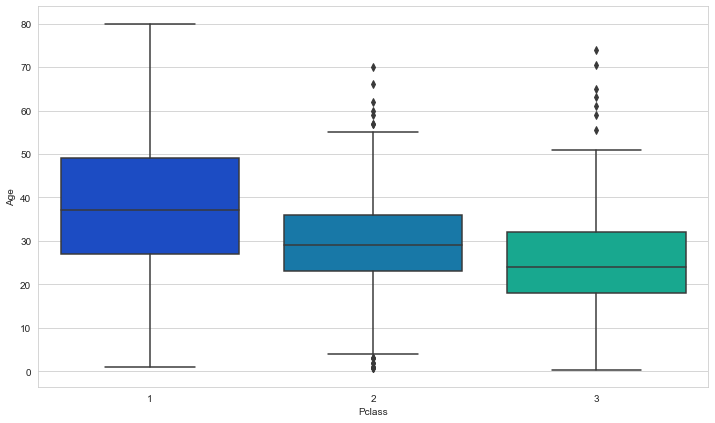

In [10]:
# now we try see statistics of age of people belonging to different class groups
plt.figure(figsize = (12, 7))
sns.boxplot(x = 'Pclass', y = 'Age', data = train, palette = 'winter')

In [11]:
# Now we replace the age of the null values with the mean value,
# as per passenger class, as we can find from the above box plot
# passenger class 1 age median is around 37
# passenger class 2 age median is around 29
# passenger class 3 age median is around 24
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [12]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis = 1)

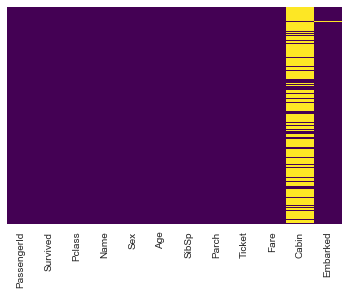

In [13]:
# we now see that we have no null value in age column in the dataset
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [14]:
# since Cabin class has majority of values as null,
# it doesn't make sense to replace the null values
# it would rather be better to drop the column altogether
train.drop(columns = ['Cabin'], axis = 1, inplace = True)

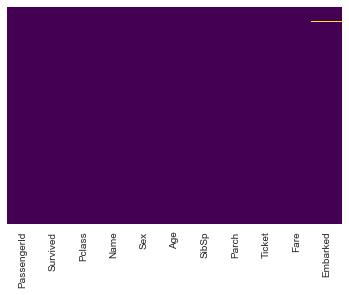

In [15]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
# we have removed all the null values from the age and cabin columns of the dataset

In [16]:
# we see that Embarked values are also null for very few data points
train.loc[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [17]:
# Since these are just two rows out of many, we choose to drop them
train.dropna(inplace = True)

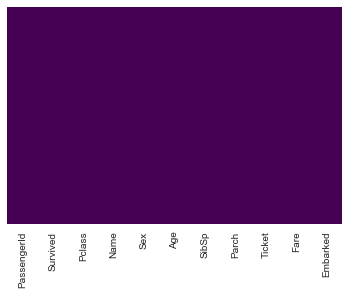

In [18]:
# We now have our dataset sans null values
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')